# Chronic Kidney Disease Prediction

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Force pandas to show all the columns

pd.set_option('display.max_columns', 26)

In [3]:
df = pd.read_csv('../data/chronic_kidney_disease_imputed.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific_gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red_blood_cells          400 non-null    object 
 7   pus_cell                 400 non-null    object 
 8   pus_cell_clumps          400 non-null    object 
 9   bacteria                 400 non-null    object 
 10  blood_glucose_random     400 non-null    float64
 11  blood_urea               400 non-null    float64
 12  serum_creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

In [5]:
# Drop the unnamed (id) column

df.drop(columns=df.columns[0], axis=1, inplace=True)

In [6]:
# Rename column headers to friendlier terms

df.columns = ["age", "blood_pressure", "specific_gravity", "albumin", "sugar", "red_blood_cells", "pus_cell",
              "pus_cell_clumps", "bacteria", "blood_glucose_random", "blood_urea", "serum_creatinine", "sodium",
              "potassium", "haemoglobin", "packed_cell_volume", "white_blood_cell_count", "red_blood_cell_count",
              "hypertension", "diabetes_mellitus", "coronary_artery_disease", "appetite", "peda_edema",
              "anemia", "class"]
len(df.columns)

25

In [7]:
df.shape

(400, 25)

In [8]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,abnormal,normal,notpresent,notpresent,121.0,36.0,1.2,134.0,5.0,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,99.0,18.0,0.8,146.0,3.5,11.3,38.0,6000.0,6.1,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,139.0,4.2,9.6,31.0,7500.0,3.9,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,133.0,5.3,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,abnormal,normal,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,abnormal,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36.0,10500.0,5.5,no,no,no,good,no,no,ckd
7,24.0,70.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,135.0,3.4,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,163.0,4.1,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [9]:
# Categorical columns (That specify different categories)
cat_cols = [col for col in df.columns if df[col].dtype == "object"]

# Numeric data columns
num_cols = [col for col in df.columns if df[col].dtype != "object"]

In [10]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'anemia',
 'class']

In [11]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [12]:
# Checking for the total number of null values

df.isna().sum().sort_values(ascending = False)

age                        0
potassium                  0
anemia                     0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

In [13]:
# Checking for no. of categories in each of the categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has ['abnormal' 'normal'] values

pus_cell has ['normal' 'abnormal'] values

pus_cell_clumps has ['notpresent' 'present'] values

bacteria has ['notpresent' 'present'] values

hypertension has ['yes' 'no'] values

diabetes_mellitus has ['yes' 'no'] values

coronary_artery_disease has ['no' 'yes'] values

appetite has ['good' 'poor'] values

peda_edema has ['no' 'yes'] values

anemia has ['no' 'yes'] values

class has ['ckd' 'notckd'] values



In [14]:
# Checking for the total number of null values

df.isna().sum().sort_values(ascending = False)

age                        0
potassium                  0
anemia                     0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

In [15]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,abnormal,normal,notpresent,notpresent,121.0,36.0,1.2,134.0,5.0,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,99.0,18.0,0.8,146.0,3.5,11.3,38.0,6000.0,6.1,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,139.0,4.2,9.6,31.0,7500.0,3.9,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,133.0,5.3,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [16]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.00000
mean,51.675000,76.550000,1.017525,1.055000,0.435000,149.34500,56.460750,3.063875,137.703750,4.584500,12.579750,38.90250,8422.500000,4.69350
std,17.022008,13.622092,0.005664,1.382662,1.069408,80.58129,49.683704,5.638989,9.789789,2.845338,2.889774,8.91272,3022.670192,1.03851
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.00000,1.500000,0.400000,4.500000,2.500000,3.100000,9.00000,2200.000000,2.10000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,99.75000,26.000000,0.900000,135.000000,3.800000,10.400000,32.75000,6500.000000,3.90000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.00000,41.000000,1.300000,138.000000,4.400000,12.700000,40.00000,7900.000000,4.80000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,169.00000,65.250000,2.800000,142.000000,4.900000,15.000000,45.00000,9800.000000,5.40000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.00000,391.000000,76.000000,163.000000,47.000000,17.800000,54.00000,26400.000000,8.00000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [18]:
# Converting class values to numeric class

df["class"] = df["class"].map({"ckd": 0, "notckd": 1})
# df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [19]:
df["class"]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

## Feature Encoding

In [20]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

anemia has 2 categories

class has 2 categories



In [21]:
# Encode the data into numeric data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,134.0,5.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,18.0,0.8,146.0,3.5,11.3,38.0,6000.0,6.1,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,139.0,4.2,9.6,31.0,7500.0,3.9,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,133.0,5.3,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


## Visualizing and understanding data

<AxesSubplot:>

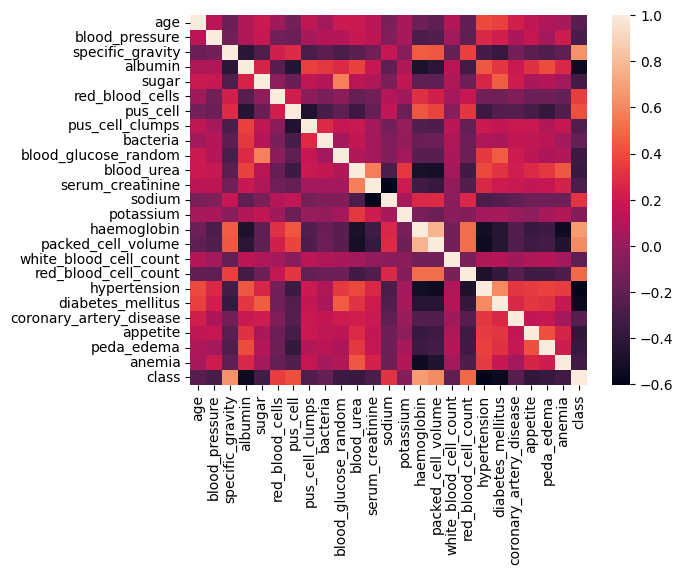

In [63]:
from seaborn import heatmap
corr = df.corr()
heatmap(corr)

<AxesSubplot:>

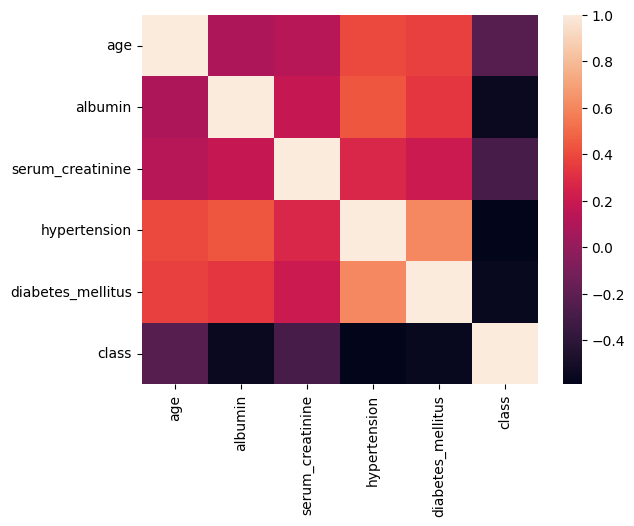

In [79]:
corr = df[["age", "albumin", 'serum_creatinine', "hypertension", "diabetes_mellitus","class"]].corr()
heatmap(corr)

<AxesSubplot:xlabel='serum_creatinine', ylabel='class'>

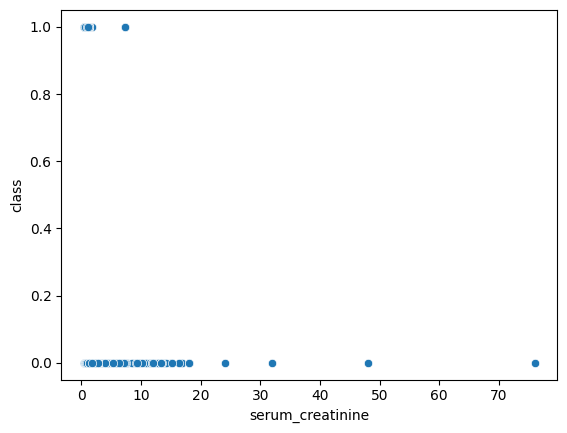

In [85]:
from seaborn import scatterplot

scatterplot(
    x="serum_creatinine",
    y="class",
    data=df
)

<AxesSubplot:xlabel='red_blood_cell_count', ylabel='class'>

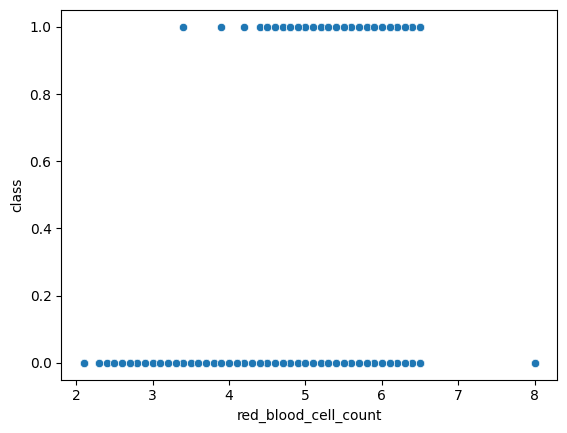

In [84]:
scatterplot(
    x="red_blood_cell_count",
    y="class",
    data=df
)

## Model Building

In [23]:
X = df[[column for column in df.columns if column != "class"]]
y = df["class"]

In [24]:
# Splitting overall data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
X_train.shape

(280, 24)

In [26]:
y_train.shape

(280,)

In [27]:
X_test.shape

(120, 24)

In [28]:
y_test.shape

(120,)

In [70]:
X_train.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia'],
      dtype='object')

### 1. Using Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree = DecisionTreeClassifier()
clf = decision_tree.fit(X_train, y_train)

print(f"Training Accuracy: {accuracy_score(y_train, decision_tree.predict(X_train))}")
print(f"Test Accuracy: {accuracy_score(y_test, decision_tree.predict(X_test))} \n")

print(f"Confusion Matrix: \n{confusion_matrix(y_test, decision_tree.predict(X_test))}\n")
print(f"Classification Report: \n{classification_report(y_test, decision_tree.predict(X_test))}")

Training Accuracy: 1.0
Test Accuracy: 0.9333333333333333 

Confusion Matrix: 
[[70  2]
 [ 6 42]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        72
           1       0.95      0.88      0.91        48

    accuracy                           0.93       120
   macro avg       0.94      0.92      0.93       120
weighted avg       0.93      0.93      0.93       120



#### K-fold cross validation

In [30]:
from sklearn import model_selection

predictions = model_selection.cross_val_predict(
    decision_tree,
    X,
    y,
    cv=model_selection.LeaveOneOut()
)

print(np.mean(predictions==y))

0.9325


#### Visualizing decision tree

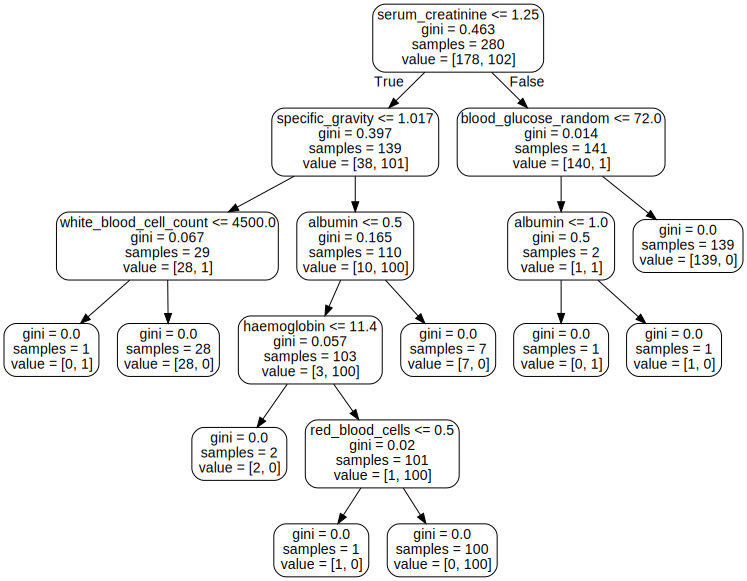

In [78]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(decision_tree, feature_names=X_train.columns, rounded=True, out_file="./outputs/decision.dot")

graphviz.Source(open("./outputs/decision.dot").read())

### 2. Using Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(
    criterion = "entropy",
    max_depth = 11,
    min_samples_leaf = 2,
    min_samples_split = 3,
    n_estimators = 130
)
random_forest_classifier.fit(X_train, y_train)

print(f"Training Accuracy: {accuracy_score(y_train, random_forest_classifier.predict(X_train))}")
print(f"Test Accuracy: {accuracy_score(y_test, random_forest_classifier.predict(X_test))} \n")

print(f"Confusion Matrix: \n{confusion_matrix(y_test, random_forest_classifier.predict(X_test))}\n")
print(f"Classification Report: \n{classification_report(y_test, random_forest_classifier.predict(X_test))}")

Training Accuracy: 0.9964285714285714
Test Accuracy: 0.9833333333333333 

Confusion Matrix: 
[[72  0]
 [ 2 46]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



### 3. K-Nearest Neighbours

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7857142857142857
Test Accuracy of KNN is 0.65 

Confusion Matrix :- 
[[47 25]
 [17 31]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.73      0.65      0.69        72
           1       0.55      0.65      0.60        48

    accuracy                           0.65       120
   macro avg       0.64      0.65      0.64       120
weighted avg       0.66      0.65      0.65       120



### 4. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(solver='lbfgs', max_iter=3000)
logistic_regression.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

logistic_regression_acc = accuracy_score(y_test, logistic_regression.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, logistic_regression.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {logistic_regression_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, logistic_regression.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, logistic_regression.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.9857142857142858
Test Accuracy of Logistic Regression is 0.9333333333333333 

Confusion Matrix :- 
[[69  3]
 [ 5 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.93      0.90      0.91        48

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



## Comparing Algorithms

The test accuracy (sorted in descending order) obtained for the used algorithms are as follows:

S.N. | Algorithms | Test Accuracy
--- | --- | --- |
1 | Random Forest Classifier | 98.33%
2 | Logistic Regression | 93.33%
3 | Decision Tree Classifier | 93.25%
4 | K-Nearest Neighbours | 65%

**Random Forest Classifier** has the highest accuracy in classifying the data.

## Saving the trained model

In [34]:
# Save the model

import pickle

with open("../models/dt_model.pkl", "wb") as f:
    pickle.dump(decision_tree, f)

with open("../models/rf_model.pkl", "wb") as f:
    pickle.dump(random_forest_classifier, f)
    
with open("../models/knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

with open("../models/lr_model.pkl", "wb") as f:
    pickle.dump(logistic_regression, f)

## Testing functions for deployment

In [35]:
X_test.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia
132,50.0,90.0,1.015,0.0,0.0,1,1,0,0,219.0,176.0,13.8,136.0,4.5,8.6,24.0,13200.0,2.7,1,0,0,0,1,1
309,51.0,60.0,1.020,0.0,0.0,1,1,0,0,129.0,25.0,1.2,139.0,5.0,17.2,40.0,8100.0,5.9,0,0,0,0,0,0
341,63.0,70.0,1.025,0.0,0.0,1,1,0,0,130.0,37.0,0.9,150.0,5.0,13.4,41.0,7300.0,4.7,0,0,0,0,0,0
196,49.0,100.0,1.010,3.0,0.0,0,0,0,0,129.0,158.0,11.8,122.0,3.2,8.1,24.0,9600.0,3.5,1,1,0,1,1,1
246,48.0,110.0,1.015,3.0,0.0,0,1,1,0,106.0,215.0,15.2,120.0,5.7,8.6,26.0,5000.0,2.5,1,0,1,0,0,1


In [41]:
# Predict a specific use case

input_values = [50.0, 70.0, 1.020, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 219.0, 176.0, 13.8, 136.0, 4.5, 8.6, 24.0, 13200.0, 2.7, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]
print(len(input_values))
print(decision_tree.predict([input_values]))

24
[0]


/home/ramraj/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
df.tail()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,0,0,0,1
399,58.0,80.0,1.025,0.0,0.0,1,1,0,0,131.0,18.0,1.1,141.0,3.5,15.8,53.0,6800.0,6.1,0,0,0,0,0,0,1


In [39]:
# Predict a specific use case

input_values = [55.0, 80.0, 1.020, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 140.0, 49.0, 0.5, 150.0, 4.9, 15.7, 47.0, 6700.0, 4.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
print(len(input_values))
print(decision_tree.predict([input_values]))

24


/home/ramraj/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[1]


In [42]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

In [54]:
x1 = pd.DataFrame(
    {
        'age': 55.0,
        'blood_pressure':80.0,
        'specific_gravity':1.020,
        'albumin':2.0,
        'sugar':0.0,
        'red_blood_cells':1.0,
        'pus_cell':1.0,
        'pus_cell_clumps':0.0,
        'bacteria':0.0,
        'blood_glucose_random':140.0,
        'blood_urea':49.0,
        'serum_creatinine':5.0,
        'sodium':150.0,
        'potassium':4.9,
        'haemoglobin':15.7,
        'packed_cell_volume':47.0,
        'white_blood_cell_count':6700.0,
        'red_blood_cell_count':4.9,
        'hypertension':0.0,
        'diabetes_mellitus':0.0,
        'coronary_artery_disease':0.0,
        'appetite':0.0,
        'peda_edema':0.0,
        'anemia':0.0,
    },
    index=[0]
)
print(logistic_regression.predict(x1))

[0]
